# TOC

__Chapter 06 - Feature transformation__

1. [Import](#Import)
1. [Dimensionality reduction](#Dimensionality-reduction)
    1. [Principal Component Analysis](#Principal-Component-Analysis)
    1. [Linear Discriminant Analysis](#Linear-Discriminant-Analysis)
    1. [LDA versus PCA](#LDA-versus-PCA)
    1. [LDA and PCA combined](#LDA-and-PCA-combined)
    


# Import

<a id = 'Import'></a>

In [1]:
# standard libary and settings
import os
import sys
import importlib
import itertools
import warnings

warnings.simplefilter("ignore")
sys.path.append(modulePath) if modulePath not in sys.path else None
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

# data extensions and settings
import numpy as np

np.set_printoptions(threshold=np.inf, suppress=True)
import pandas as pd

pd.set_option("display.max_rows", 500)
pd.options.display.float_format = "{:,.6f}".format

# modeling extensions
import sklearn.preprocessing as preprocessing
import sklearn.pipeline as pipeline
import sklearn.neighbors as neighbors
import sklearn.model_selection as model_selection

# visualization extensions and settings
import seaborn as sns
import matplotlib.pyplot as plt

# custom extensions and settings
sys.path.append("/home/mlmachine") if "/home/mlmachine" not in sys.path else None
sys.path.append("/home/prettierplot") if "/home/prettierplot" not in sys.path else None

import mlmachine as mlm
from prettierplot.plotter import PrettierPlot
import prettierplot.style as style

# magic functions
%matplotlib inline

__The process so far__

This text has segmented the feature engineering process into several different steps:

- EDA - Create visualizations to understand the structure of the features and how features relate to each other
- Feature understanding - Identify the level of measurement and understand how to clean specific columns as necessary
- Feature improvement - Alter data vlaues and entire columns by imputing missing values (the imputation method depends on the level of measurement), and perform dummy variable transformations and value scaling as necessary
- Feature construction - Construct new columns to account for feature interaction, and domain knowledge-based adjustments
- Feature selection - With all original and constructed features in hand, perform (typically univariate) statistical tests in order to isolate the bes tperforming features. This step removes noise and speeds up calculations.

This chapter will focus on feature transformations, as suite of algorithms designed to alter the internal strucutre of the data to produce mathematically superior features

# Dimensionality reduction

<a id = 'Dimensionality-reduction'></a>

## Principal Component Analysis

<a id = 'Principal-Component-Analysis'></a>

In [2]:
# load and inspect data
import sklearn.datasets as datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

print(iris.target_names)
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


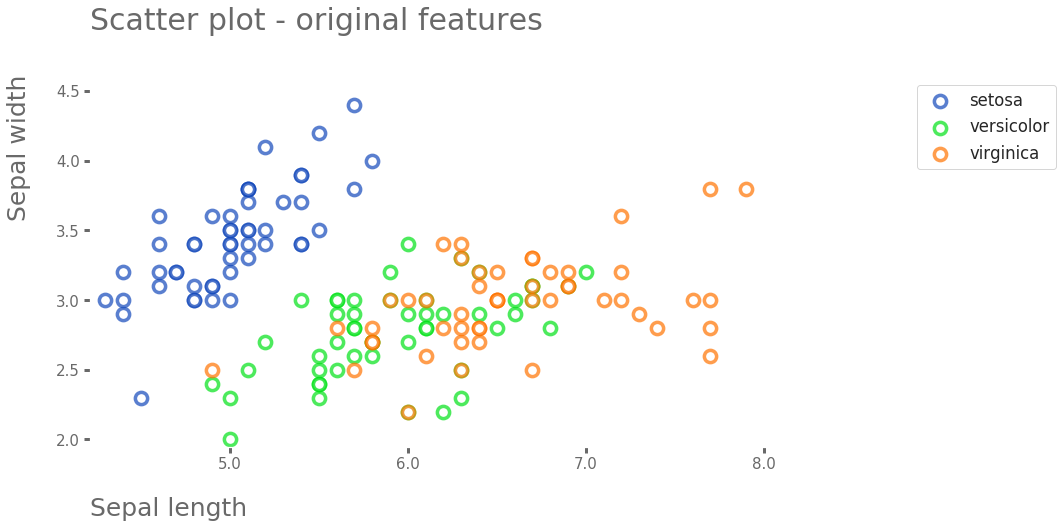

In [28]:
# visualize two predictor variables, hued by target
p = PrettierPlot()
ax = p.make_canvas(
    title="Scatter plot - original features",
    x_label="Sepal length",
    y_label="Sepal width",
    y_shift=0.55,
)
p.pretty_2d_scatter_hue(
    x=X[:, 0],
    y=X[:, 1],
    target=y,
    label=iris.target_names,
    x_units="ff",
    y_units="ff",
    bbox=(1.2, 0.9),
    ax=ax,
)

In [19]:
# sklearn's implementation of PCA
import sklearn.decomposition as decomposition

pca = decomposition.PCA(n_components=2)
pca.fit(X)

print(pca.components_)

[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


In [20]:
# transform original X data based on PCA
X_pca = pca.transform(X)

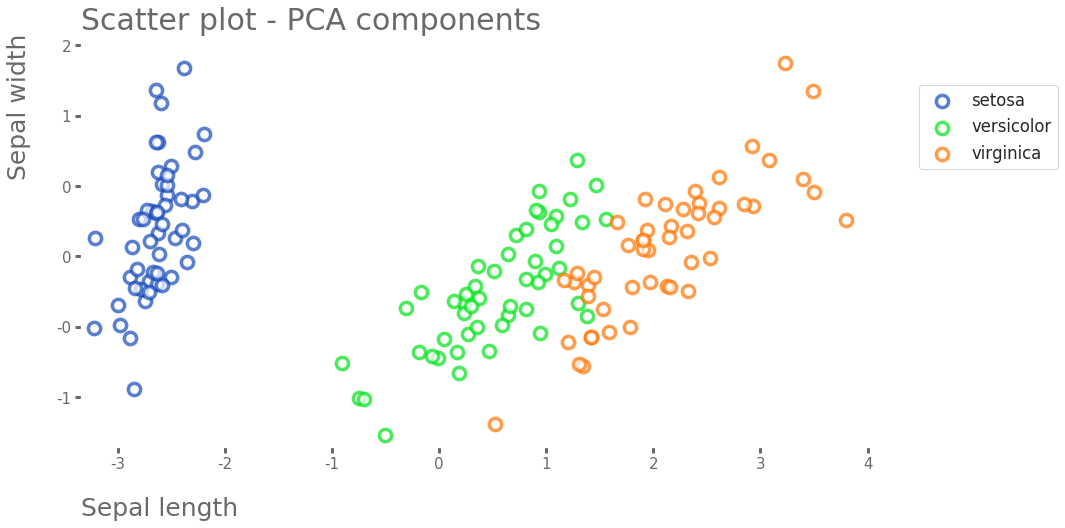

In [32]:
# visualize two principal components, hued by label
p = PrettierPlot()
ax = p.make_canvas(
    title="Scatter plot - PCA components",
    x_label="Sepal length",
    y_label="Sepal width",
    y_shift=0.65,
)
p.pretty_2d_scatter_hue(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    target=y,
    label=iris.target_names,
    x_units="f",
    y_units="f",
    bbox=(1.2, 0.9),
    ax=ax,
)

In [22]:
# explained variance by the top 2 principal components
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

> Remarks - The top 2 principal components capture nearly 98% of variance in the data.

In [23]:
# compare correlation of original dataset and PCA dataset
# to illustrate how the PCA axes are practically uncorrelated
# average correlation among original feature
np.mean(np.corrcoef(X.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]])

0.15551181623163546

In [24]:
# review correlation after PCA
full_pca = decomposition.PCA(n_components=4)
full_pca.fit(X)
X_pca_full = full_pca.transform(X)
np.mean(np.corrcoef(X_pca_full.T)[[0, 0, 0, 1, 1], [1, 2, 3, 2, 3]])

7.503765838769254e-16

> Remarks - The average correlation coefficient of the original feature set is 15.5. Small, but not zero. The average correlation coefficient of the full PCA datasets is practically zero. In more tangible terms, the PCA dataset has fewer correlated features, which in general is helpful when fit a machine learning model.

> One additional thing to note is that feature scaling is still a factor in PCA, but less so. The most noticeable different likely will occur when obesrving the explained variance ratio. Scaled features may show a reduced amount of variance explained because the columns' covariance with on one another becomes most consistent and the variance explained by each principal component was spread out.

## Linear Discriminant Analysis

LDA is commonly used as a preprocessing step in classificaiton pipelines, because LDA strives to optimize the lower-dimensional space for the best class separability. This means the new coordinate system is more useful in finding decision boundaries for classificaiton models.

<a id = 'Linear-Discriminant-Analysis'></a>

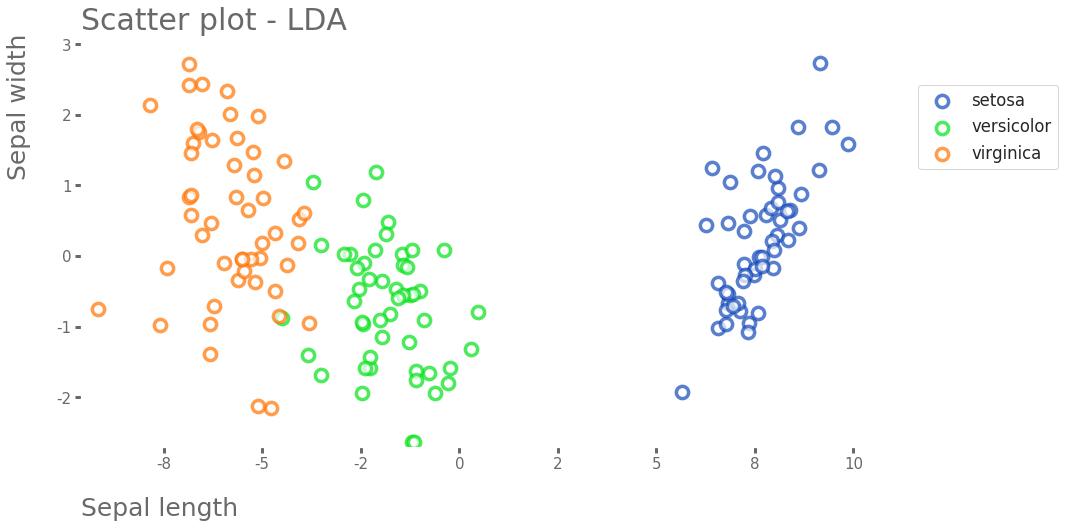

In [34]:
# implementing in sklearn
import sklearn.discriminant_analysis as discriminant_analysis

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)

X_lda = lda.fit_transform(X, y)

# visualize LDA transformation
p = PrettierPlot()
ax = p.make_canvas(
    title="Scatter plot - LDA", x_label="Sepal length", y_label="Sepal width", y_shift=0.65
)
p.pretty_2d_scatter_hue(
    x=X_lda[:, 0],
    y=X_lda[:, 1],
    target=y,
    label=iris.target_names,
    x_units="f",
    y_units="f",
    bbox=(1.2, 0.9),
    ax=ax,
)

In [35]:
# print variance explained by the two components
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

## LDA versus PCA

<a id = 'LDA-versus-PCA'></a>

In [36]:
# compare LDA and PCA
single_pca = decomposition.PCA(n_components=1)
single_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=1)
knn = neighbors.KNeighborsClassifier(n_neighbors=3)

In [37]:
# baseline accuarcy
knn_average = model_selection.cross_val_score(knn, X, y).mean()
knn_average

0.9803921568627452

In [38]:
# LDA with a single component accuracy
lda_pipeline = pipeline.Pipeline([("lda", single_lda), ("knn", knn)])

lda_average = model_selection.cross_val_score(lda_pipeline, X, y).mean()
lda_average

0.9673202614379085

> Remarks - Using LDA with a single component performs worse

In [39]:
# PCA with a single component accuracy
pca_pipeline = pipeline.Pipeline([("pca", single_pca), ("knn", knn)])

pca_average = model_selection.cross_val_score(pca_pipeline, X, y).mean()
pca_average

0.8941993464052288

> Remarks - Using PCA with a single component performs much worse

In [41]:
# LDA with twp components accuracy
lda_pipeline = pipeline.Pipeline(
    [
        ("lda", discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)),
        ("knn", knn),
    ]
)

lda_average = model_selection.cross_val_score(lda_pipeline, X, y).mean()
lda_average

0.9803921568627452

> Remarks - Using LDA with two component achieves the baseline accuracy

## LDA and PCA combined

<a id = 'LDA-and-PCA-combined'></a>

In [42]:
# custom function for performing cross-validated grid search
def get_best_model_and_accuracy(model, params, X, y):
    grid = model_selection.GridSearchCV(model, params, error_score=0.0)
    grid.fit(X, y)

    print("Best Accuracy: {}".format(grid.best_score_))
    print("Best Parameters: {}".format(grid.best_params_))

    avg_time_fit = round(grid.cv_results_["mean_fit_time"].mean(), 3)
    print("Average Time to Fit (s): {}".format(avg_time_fit))

In [43]:
# parameter grid
params = {
    "prep__scale__with_std": [True, False],
    "prep__scale__with_mean": [True, False],
    "prep__pca__n_components": [1, 2, 3, 4],
    "prep__lda__n_components": [1, 2],
    "clf__n_neighbors": [1, 9],
}

# preprocessing pipeline
prep = pipeline.Pipeline(
    [
        ("scale", preprocessing.StandardScaler()),
        ("pca", decomposition.PCA()),
        ("lda", discriminant_analysis.LinearDiscriminantAnalysis()),
    ]
)

# model pipeline
pipe = pipeline.Pipeline([("prep", prep), ("clf", neighbors.KNeighborsClassifier())])

# run cross validated grid search
get_best_model_and_accuracy(pipe, params, X, y)

/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(1, 3 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:466: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(

Best Accuracy: 0.9866666666666667
Best Parameters: {'clf__n_neighbors': 9, 'prep__lda__n_components': 1, 'prep__pca__n_components': 3, 'prep__scale__with_mean': True, 'prep__scale__with_std': False}
Average Time to Fit (s): 0.002


/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change number results when test-set sizes are unequal.
  DeprecationWarning)


> Remarks - Best accuracy so far achieved by combining PCA with LDA.